<a href="https://colab.research.google.com/github/astrrr/ML-Lab/blob/main/Activity9_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import glob
from scipy import stats
import datetime as dt
from sklearn import preprocessing

# 9.1 Data Preparation

* 9.1.1 -> 8.1 (a) Load and Prepare Data

In [313]:
# Load data from csv 3 files
# acceleration.txt, heartrate.txt, labeled_sleep.txt
ACC = pd.read_csv('/content/46343_acceleration.txt', sep = ' ',names=['timedelta', 'accX', 'accY', 'accZ'])
HeartR = pd.read_csv('/content/46343_heartrate.txt', sep = ',',names=['timedelta', 'heartrate'])
SleepL = pd.read_csv('/content/46343_labeled_sleep.txt', sep = ' ',names=['timedelta', 'sleep'])


In [314]:
# Check ‘timedelta’ max(), min() of ACC, HeartR, SleepL (ช่วงเวลาที่มีข้อมูลใกล้กัน)
# Ex
max_list = []
min_list = []
ACC_max_date = ACC['timedelta'].max()
ACC_min_date = ACC['timedelta'].min()

HeartR_max_date = HeartR['timedelta'].max()
HeartR_min_date = HeartR['timedelta'].min()

SleepL_max_date = SleepL['timedelta'].max()
SleepL_min_date = SleepL['timedelta'].min()

max_list.append(ACC_max_date)
max_list.append(HeartR_max_date)
max_list.append(SleepL_max_date)

min_list.append(ACC_min_date)
min_list.append(HeartR_min_date)
min_list.append(SleepL_min_date)

In [315]:
print(f'ACC min//max : {ACC_min_date} // {ACC_max_date}')
print(f'HeartR min//max : {HeartR_min_date} // {HeartR_max_date}')
print(f'SleepL min//max : {SleepL_min_date} // {SleepL_max_date}')

ACC min//max : -124489.16105 // 17643.046417
HeartR min//max : -556410.36066 // 16980.47229
SleepL min//max : 0 // 16980


In [316]:
# หา start_timedelta, end_timedelta
start_timedelta = np.array(min_list).max()
end_timedelta = np.array(max_list).min()

In [317]:
print('start_timedelta : ',start_timedelta)
print('end_timedelta   : ',end_timedelta)

start_timedelta :  0.0
end_timedelta   :  16980.0


In [318]:
# select only intersected timedelta (ACC, HeartR, SleepL) (ช่วงเวลาที่มีข้อมูลใกล้กัน)

ACC_new = ACC[(ACC['timedelta'] > start_timedelta) &(ACC['timedelta'] < end_timedelta)]
HeartR_new = HeartR[(HeartR['timedelta'] > start_timedelta) &(HeartR['timedelta'] < end_timedelta)]
SleepL_new = SleepL[(SleepL['timedelta'] > start_timedelta) &(SleepL['timedelta'] < end_timedelta)]

In [319]:
ACC_new

,timedelta,accX,accY,accZ
98777,0.000721,-0.234650,0.905975,0.362747
98778,0.017162,-0.231232,0.893265,0.371613
98779,0.037183,-0.227814,0.915848,0.369049
98780,0.057108,-0.240524,0.919159,0.352890
98781,0.076929,-0.240448,0.889175,0.350143
...,...,...,...,...
948796,16979.905934,-0.442413,-0.527573,0.723450
948797,16979.925889,-0.441925,-0.527573,0.721985
948798,16979.945849,-0.441437,-0.526108,0.721985
948799,16979.965927,-0.443405,-0.525116,0.723434


In [320]:
HeartR_new

,timedelta,heartrate
1576,8.47840,97
1577,13.47840,95
1578,18.47840,96
1579,19.47840,95
1580,24.47840,95
...,...,...
4872,16954.47226,73
4873,16959.47229,72
4874,16964.47229,74
4875,16970.47229,75


In [321]:
SleepL_new

,timedelta,sleep
1,30,-1
2,60,-1
3,90,-1
4,120,-1
5,150,-1
...,...,...
561,16830,0
562,16860,0
563,16890,0
564,16920,0


* 9.1.1 -> 8.1 (b) Load and Prepare Data (ACC)

In [322]:
from pandas.tseries.offsets import *
# ------------ Rounding ACC (Rounding to 1 sec) -------------------------------
# Convert to datetime and round to second,
ACC_new['timedelta'] = pd.DataFrame(pd.to_timedelta(ACC_new['timedelta'], unit='s').round('1s'))
HeartR_new['timedelta'] = pd.DataFrame(pd.to_timedelta(HeartR_new['timedelta'], unit='s').round('1s'))
SleepL_new['timedelta'] = pd.DataFrame(pd.to_timedelta(SleepL_new['timedelta'], unit='s').round('1s'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [323]:
ACC_new

,timedelta,accX,accY,accZ
98777,0 days 00:00:00,-0.234650,0.905975,0.362747
98778,0 days 00:00:00,-0.231232,0.893265,0.371613
98779,0 days 00:00:00,-0.227814,0.915848,0.369049
98780,0 days 00:00:00,-0.240524,0.919159,0.352890
98781,0 days 00:00:00,-0.240448,0.889175,0.350143
...,...,...,...,...
948796,0 days 04:43:00,-0.442413,-0.527573,0.723450
948797,0 days 04:43:00,-0.441925,-0.527573,0.721985
948798,0 days 04:43:00,-0.441437,-0.526108,0.721985
948799,0 days 04:43:00,-0.443405,-0.525116,0.723434


In [324]:
HeartR_new

,timedelta,heartrate
1576,0 days 00:00:08,97
1577,0 days 00:00:13,95
1578,0 days 00:00:18,96
1579,0 days 00:00:19,95
1580,0 days 00:00:24,95
...,...,...
4872,0 days 04:42:34,73
4873,0 days 04:42:39,72
4874,0 days 04:42:44,74
4875,0 days 04:42:50,75


In [325]:
SleepL_new

,timedelta,sleep
1,0 days 00:00:30,-1
2,0 days 00:01:00,-1
3,0 days 00:01:30,-1
4,0 days 00:02:00,-1
5,0 days 00:02:30,-1
...,...,...
561,0 days 04:40:30,0
562,0 days 04:41:00,0
563,0 days 04:41:30,0
564,0 days 04:42:00,0


In [326]:
# Average rounding duplicated time
df_acc_X = ACC_new.groupby('timedelta')['accX'].mean().reset_index()
df_acc_Y = ACC_new.groupby('timedelta')['accY'].mean().reset_index()
df_acc_Z = ACC_new.groupby('timedelta')['accZ'].mean().reset_index()

In [327]:
result = pd.merge(df_acc_X, df_acc_Y, on=["timedelta"])

In [328]:
result = pd.merge(result, df_acc_Z, on=["timedelta"])

In [329]:
acc_xyz = result

In [330]:
acc_xyz

,timedelta,accX,accY,accZ
0,0 days 00:00:00,-0.243203,0.895372,0.367591
1,0 days 00:00:01,-0.240757,0.873826,0.415446
2,0 days 00:00:02,-0.244620,0.883943,0.387026
3,0 days 00:00:03,-0.248036,0.902427,0.347812
4,0 days 00:00:04,-0.241778,0.912946,0.321502
...,...,...,...,...
16976,0 days 04:42:56,-0.442763,-0.525892,0.722950
16977,0 days 04:42:57,-0.441990,-0.525476,0.723410
16978,0 days 04:42:58,-0.441581,-0.525116,0.724003
16979,0 days 04:42:59,-0.442283,-0.525849,0.723265


* **before / after**

In [331]:
print('--------------------Before convert date time and round and AVG to 1s-------------')
print(ACC[0:5])
print('--------------------After convert date time and round and AVG to 1s-------------')
print(acc_xyz[0:5])

--------------------Before convert date time and round and AVG to 1s-------------
       timedelta      accX      accY      accZ
0 -124489.161050  0.017487 -0.586700 -0.805771
1 -124489.116395  0.018982 -0.589676 -0.809158
2 -124489.115548  0.020966 -0.580887 -0.815048
3 -124489.114691  0.019485 -0.580872 -0.813583
4 -124489.097700  0.016998 -0.587204 -0.806259
--------------------After convert date time and round and AVG to 1s-------------
        timedelta      accX      accY      accZ
0 0 days 00:00:00 -0.243203  0.895372  0.367591
1 0 days 00:00:01 -0.240757  0.873826  0.415446
2 0 days 00:00:02 -0.244620  0.883943  0.387026
3 0 days 00:00:03 -0.248036  0.902427  0.347812
4 0 days 00:00:04 -0.241778  0.912946  0.321502


* 9.1.1 ->8.1 (c) Load and Prepare Data (Heart rate)

In [332]:
# ------------ Rounding Heart Rate (Rounding to 1 sec) -------------------------------
# Resampling every 1s with median with ffill
resample_rule = '1s'
HeartR_new2 = HeartR_new.set_index('timedelta').resample(resample_rule,).median().ffill()

In [333]:
HeartR_new2

,heartrate
timedelta,
0 days 00:00:08,97.0
0 days 00:00:09,97.0
0 days 00:00:10,97.0
0 days 00:00:11,97.0
0 days 00:00:12,97.0
...,...
0 days 04:42:51,75.0
0 days 04:42:52,75.0
0 days 04:42:53,75.0


* 9.1.1 -> 8.1 (d) Load and Prepare Data (Sleep Label)

In [334]:
# Resampling every 1s with median with ffill
resample_rule = '1s'
SleepL_new2 = SleepL_new.set_index('timedelta').resample(resample_rule,).median().ffill()

In [335]:
SleepL_new2

,sleep
timedelta,
0 days 00:00:30,-1.0
0 days 00:00:31,-1.0
0 days 00:00:32,-1.0
0 days 00:00:33,-1.0
0 days 00:00:34,-1.0
...,...
0 days 04:42:26,0.0
0 days 04:42:27,0.0
0 days 04:42:28,0.0


* 9.1.1 -> 8.1 (e) Merge Data and Standardized data

In [336]:
# ------------Merge All Data -------------------------------
df = []
df = pd.merge_asof(acc_xyz, HeartR_new2, on='timedelta')
df = pd.merge_asof(df, SleepL_new2, on = 'timedelta')

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16981 entries, 0 to 16980
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   timedelta  16981 non-null  timedelta64[ns]
 1   accX       16981 non-null  float64        
 2   accY       16981 non-null  float64        
 3   accZ       16981 non-null  float64        
 4   heartrate  16973 non-null  float64        
 5   sleep      16951 non-null  float64        
dtypes: float64(5), timedelta64[ns](1)
memory usage: 928.6 KB


In [338]:
# Fill NA
# Heart rate
median = df['heartrate'].median()
df["heartrate"].fillna(median, inplace = True)

In [339]:
# Sleep Label
# Fillna() # with 0
df["sleep"].fillna(0, inplace = True)

In [340]:
df

,timedelta,accX,accY,accZ,heartrate,sleep
0,0 days 00:00:00,-0.243203,0.895372,0.367591,82.0,0.0
1,0 days 00:00:01,-0.240757,0.873826,0.415446,82.0,0.0
2,0 days 00:00:02,-0.244620,0.883943,0.387026,82.0,0.0
3,0 days 00:00:03,-0.248036,0.902427,0.347812,82.0,0.0
4,0 days 00:00:04,-0.241778,0.912946,0.321502,82.0,0.0
...,...,...,...,...,...,...
16976,0 days 04:42:56,-0.442763,-0.525892,0.722950,76.0,0.0
16977,0 days 04:42:57,-0.441990,-0.525476,0.723410,76.0,0.0
16978,0 days 04:42:58,-0.441581,-0.525116,0.724003,76.0,0.0
16979,0 days 04:42:59,-0.442283,-0.525849,0.723265,76.0,0.0


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16981 entries, 0 to 16980
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   timedelta  16981 non-null  timedelta64[ns]
 1   accX       16981 non-null  float64        
 2   accY       16981 non-null  float64        
 3   accZ       16981 non-null  float64        
 4   heartrate  16981 non-null  float64        
 5   sleep      16981 non-null  float64        
dtypes: float64(5), timedelta64[ns](1)
memory usage: 928.6 KB


In [342]:
# Drop column timedelta
df.drop(df.columns[0], axis =1 ,inplace=True)

In [343]:
df

,accX,accY,accZ,heartrate,sleep
0,-0.243203,0.895372,0.367591,82.0,0.0
1,-0.240757,0.873826,0.415446,82.0,0.0
2,-0.244620,0.883943,0.387026,82.0,0.0
3,-0.248036,0.902427,0.347812,82.0,0.0
4,-0.241778,0.912946,0.321502,82.0,0.0
...,...,...,...,...,...
16976,-0.442763,-0.525892,0.722950,76.0,0.0
16977,-0.441990,-0.525476,0.723410,76.0,0.0
16978,-0.441581,-0.525116,0.724003,76.0,0.0
16979,-0.442283,-0.525849,0.723265,76.0,0.0


In [344]:
# Standardized data
feature_columns = ['accX', 'accY', 'accZ', 'heartrate']
label_columns = ['sleep']
df_feature = df[feature_columns]  # standardized data of df_feature
df_label = df[label_columns]

In [345]:
df_feature

,accX,accY,accZ,heartrate
0,-0.243203,0.895372,0.367591,82.0
1,-0.240757,0.873826,0.415446,82.0
2,-0.244620,0.883943,0.387026,82.0
3,-0.248036,0.902427,0.347812,82.0
4,-0.241778,0.912946,0.321502,82.0
...,...,...,...,...
16976,-0.442763,-0.525892,0.722950,76.0
16977,-0.441990,-0.525476,0.723410,76.0
16978,-0.441581,-0.525116,0.724003,76.0
16979,-0.442283,-0.525849,0.723265,76.0


In [346]:
df_label

,sleep
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
16976,0.0
16977,0.0
16978,0.0
16979,0.0


In [347]:
# standardize data
X_scaler = preprocessing.StandardScaler()
X_tranfrom = X_scaler.fit_transform(df_feature)

In [348]:
X_tranfrom

array([[-0.58754699,  3.05807519,  0.69872824,  0.14353909],
       [-0.58145574,  2.99509378,  0.75774575,  0.14353909],
       [-0.59107524,  3.02466836,  0.72269623,  0.14353909],
       ...,
       [-1.08151136, -1.0942955 ,  1.13827323, -0.63045529],
       [-1.08325986, -1.09644011,  1.13736319, -0.63045529],
       [-1.08423404, -1.09676929,  1.13663908, -0.63045529]])

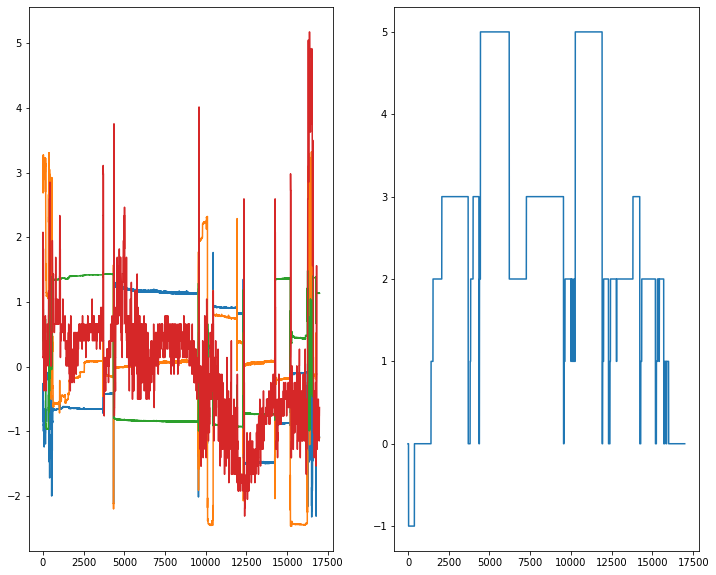

In [349]:
# Visualize signals
fig = plt.figure(figsize=(12,10))

fig.add_subplot(121)
plt.plot(X_tranfrom)

fig.add_subplot(122)
plt.plot(df_label)

plt.show()

* 9.1.2.1 Create 3d input

In [350]:
df_label = pd.DataFrame(df_label)

In [351]:
df_label

,sleep
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
16976,0.0
16977,0.0
16978,0.0
16979,0.0


In [352]:
n_feature = 4

In [353]:
# ------------ 1D to 3D feature-------------------------------
# set sliding window parameter
df_feature3D = []
df_feature3D_result =[]
df_label_new = []
slidingW = 100
stride_step = 5

for t in range( 0 , len(df_feature), stride_step):
  
  try:
    F3d = df_feature[ t : t + slidingW]
    
    
    df_feature3D.append(F3d)
    df_feature3D = np.array(df_feature3D)
    #df_feature3D = np.moveaxis(df_feature3D, 1, -1)
    df_feature3D.reshape(slidingW, n_feature, 1)
    #print(df_feature3D.shape)
    #print(df_feature3D)
    df_feature3D_result.append(df_feature3D)
    df_feature3D = []
    Labels = stats.mode( df_label[t : t+slidingW])
    df_label_new.append(Labels)
  except ValueError as v:
    print(v)
  except AttributeError as a:
    print(a)

cannot reshape array of size 384 into shape (100,4,1)
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'
'numpy.ndarray' object has no attribute 'append'


In [354]:
df_feature3D_result = np.array(df_feature3D_result)
df_feature3D_result.shape

(3377, 1, 100, 4)

In [355]:
df_feature3D_result = np.moveaxis(df_feature3D_result, 1, -1)

In [356]:
df_feature3D_result.shape

(3377, 100, 4, 1)

In [357]:
df_label_new3D = np.array(df_label_new)

In [358]:
df_label_new3D[0][0]

array([[-1.]])

In [359]:
df_y = []
for i in range(3377):
  if df_label_new3D[i][0] == -1:
    df_y.append(0)
  elif df_label_new3D[i][0] == 0:
    df_y.append(1)
  elif df_label_new3D[i][0] == 1:
    df_y.append(2)
  elif df_label_new3D[i][0] == 2:
    df_y.append(3)
  elif df_label_new3D[i][0] == 3:
    df_y.append(4)
  elif df_label_new3D[i][0] == 5:
    df_y.append(5)

In [360]:
df_y = np.array(df_y)

In [361]:
df_y.shape

(3377,)

In [362]:
# df_label_new = np.moveaxis(df_label_new, 1, -1)

* 9.1.2 Train Test Split

In [363]:
# ------------ Train-Test-Split 2D features -------------------------------
x_train, x_test, y_train, y_test = train_test_split( df_feature, df_label)

In [364]:
# ------------ Train-Test-Split 3D features -------------------------------
x3D_train, x3D_test, y3D_train, y3D_test = train_test_split(df_feature3D_result , df_y)

# 9.2 NN Model Train and Test

* 9.2.1 NN Model Train Test

In [365]:
from sklearn.neural_network import MLPClassifier

In [366]:
# ------------ NN Architecture parameter -------------------------------
Hidden_Layer_param = (30, 30, 30)
mlp = MLPClassifier(hidden_layer_sizes = Hidden_Layer_param)

In [367]:
# ------------ Training NN using 1D features -------------------------------
mlp.fit(x_train,y_train)
mlp_pred = mlp.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [368]:
# View Confusion Matrix and Classification Report
print('Confusion Matrix of MLPClassifier : ')
print(confusion_matrix(y_test,mlp_pred))
print('//////////////////////////////////////////////////////////////////')
print('Calassification report of MLPClassifier : ')
print(classification_report(y_test,mlp_pred))

Confusion Matrix of MLPClassifier : 
[[  77    7    1    6    0    0]
 [   4  418   88   79   19   17]
 [   0   44  104   73    4    6]
 [   0   21   96  892  220   78]
 [   0    1    0   36 1141    1]
 [   0    1    2   15    8  787]]
//////////////////////////////////////////////////////////////////
Calassification report of MLPClassifier : 
              precision    recall  f1-score   support

        -1.0       0.95      0.85      0.90        91
         0.0       0.85      0.67      0.75       625
         1.0       0.36      0.45      0.40       231
         2.0       0.81      0.68      0.74      1307
         3.0       0.82      0.97      0.89      1179
         5.0       0.89      0.97      0.92       813

    accuracy                           0.81      4246
   macro avg       0.78      0.76      0.77      4246
weighted avg       0.81      0.81      0.80      4246



# 9.3 CNN Model Train and Test

CNN Model Architecture 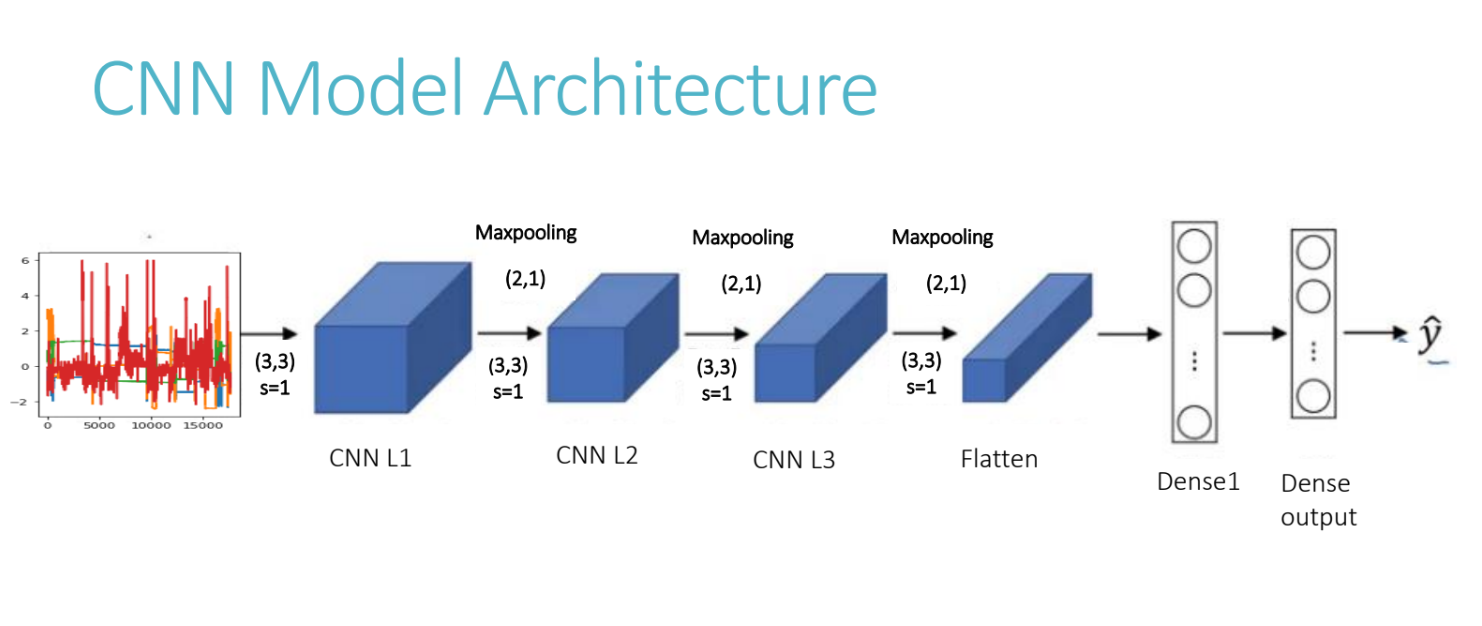

* 9.3.1 CNN Model Train Test

In [369]:
x3D_test.shape

(845, 100, 4, 1)

In [393]:
y3D_test.shape

(845,)

In [498]:
# ------------ CNN Architecture parameter -------------------------------
# Nlayer (CNN, dense), Nnode, Activation
CNN_L1 = 16 
CNN_L2 = 64
CNN_L3 = 128

D_L1 = 512
D_L2 = 64
D_out = 6

Act_func = 'relu'
Ker_size = (3,3)
Pooling_size = (2,1)
Input_shape = (slidingW, n_feature, 1)

opt = tf.keras.optimizers.Adam(learning_rate=0.0003, name='Adam') 

In [499]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [500]:
model = Sequential()

In [501]:
# ------------ Create CNN Model -------------------------------
model.add(Conv2D(CNN_L1, kernel_size=Ker_size, activation=Act_func, input_shape=Input_shape,padding='same'))
model.add(MaxPooling2D(pool_size=Pooling_size))
model.add(Dropout(0.4))

model.add(Conv2D(CNN_L2, kernel_size=Ker_size, activation= Act_func, padding='same'))
model.add(MaxPooling2D(pool_size= Pooling_size))
model.add(Dropout(0.4))

model.add(Conv2D(CNN_L3, kernel_size=Ker_size, activation= Act_func, padding='same'))
model.add(MaxPooling2D(pool_size= Pooling_size))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(D_L1 , activation= Act_func ))
model.add(Dense(D_L2 , activation= Act_func ))
model.add(Dense(D_out, activation='softmax'))
model.compile(optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 100, 4, 16)        160       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 50, 4, 16)        0         
 g2D)                                                            
                                                                 
 dropout_51 (Dropout)        (None, 50, 4, 16)         0         
                                                                 
 conv2d_54 (Conv2D)          (None, 50, 4, 64)         9280      
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 25, 4, 64)        0         
 g2D)                                                            
                                                                 
 dropout_52 (Dropout)        (None, 25, 4, 64)       

* 9.3.1 CNN Model Train Test

In [502]:
# ------------ Create Optimizer -------------------------------
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              #loss='sparse_categorical_crossentropy',
              metrics=["acc"])

In [503]:
# ------ Train CNN using 3D feature--------------------------------------------
history = model.fit(x3D_train, y3D_train, epochs=500, batch_size=64,
                    validation_data=(x3D_test, y3D_test),)

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


40/40 [==============================] - 1s 19ms/step - loss: 4.8594 - acc: 0.2642 - val_loss: 1.6053 - val_acc: 0.1882
Epoch 2/500
40/40 [==============================] - 0s 6ms/step - loss: 1.5771 - acc: 0.2930 - val_loss: 1.6137 - val_acc: 0.3195
Epoch 3/500
40/40 [==============================] - 0s 6ms/step - loss: 1.5755 - acc: 0.2919 - val_loss: 1.5727 - val_acc: 0.3136
Epoch 4/500
40/40 [==============================] - 0s 6ms/step - loss: 1.5637 - acc: 0.3045 - val_loss: 1.6049 - val_acc: 0.3704
Epoch 5/500
40/40 [==============================] - 0s 5ms/step - loss: 1.5585 - acc: 0.3013 - val_loss: 1.5879 - val_acc: 0.3136
Epoch 6/500
40/40 [==============================] - 0s 5ms/step - loss: 1.5383 - acc: 0.3120 - val_loss: 1.5557 - val_acc: 0.3136
Epoch 7/500
40/40 [==============================] - 0s 6ms/step - loss: 1.4565 - acc: 0.3440 - val_loss: 1.4886 - val_acc: 0.4142
Epoch 8/500
40/40 [==============================] - 0s 6ms/step - loss: 1.3305 - acc: 0.3922 

In [504]:
# ------- Test CNN -------------------------------
CNN_pred = model.predict(x3D_test)

In [505]:
print(CNN_pred[0])
print(CNN_pred[0].max())

[7.8583352e-04 1.8443977e-02 3.9046682e-08 9.8852187e-02 8.8188440e-01
 3.3487238e-05]
0.8818844


In [506]:
from numpy import unravel_index
CNN_pred_new = []
pred_new = []
for i in range(len(CNN_pred)):
  CNN_pred_new.append(unravel_index(CNN_pred[i].argmax(), CNN_pred.shape))

for j in range(len(CNN_pred_new)):
  pred_new.append(CNN_pred_new[j][1])

* 9.3.2 Performnace of CNN Model

In [507]:
# ------------ View Confusion Matrix, Classification Report -------------------------------
# View Confusion Matrix and Classification Report
print('Confusion Matrix of CNNClassifier : ')
print(confusion_matrix(y3D_test,pred_new))

print('//////////////////////////////////////////////////////////////////')
print('Calassification report of MLPClassifier : ')
print(classification_report(y3D_test,pred_new))

Confusion Matrix of CNNClassifier : 
[[ 15   0   0   0   0   0]
 [  2  90   1  20   0   0]
 [  0   8  20  19   0   0]
 [  0   2   0 239   0  24]
 [  0   1   0  64 181   0]
 [  0   0   0   0   0 159]]
//////////////////////////////////////////////////////////////////
Calassification report of MLPClassifier : 
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.89      0.80      0.84       113
           2       0.95      0.43      0.59        47
           3       0.70      0.90      0.79       265
           4       1.00      0.74      0.85       246
           5       0.87      1.00      0.93       159

    accuracy                           0.83       845
   macro avg       0.88      0.81      0.82       845
weighted avg       0.86      0.83      0.83       845



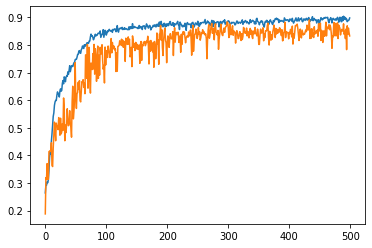

In [508]:
# ------ View History Graph -------------------------------------------
# View Accuracy Graph
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

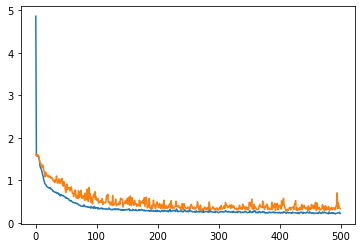

In [509]:
# View Loss Graph
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()